# Regularization Review

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mglearn

from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from mglearn.datasets import load_extended_boston

In [2]:
X, y = load_extended_boston()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Train RMSE: ", np.sqrt(mean_squared_error(lr.predict(X_train), y_train)))
print("Test RMSE:", np.sqrt(mean_squared_error(lr.predict(X_test), y_test)))

Train RMSE:  2.37636959206121
Test RMSE: 3.4845125880530903


In [5]:
def model_test(model):
    lr = model
    lr.fit(X_train, y_train)
    print("Train r2", lr.score(X_train, y_train))
    print("Test r2", lr.score(X_test, y_test))
    print("Train RMSE: ", np.sqrt(mean_squared_error(lr.predict(X_train), y_train)))
    print("Test RMSE:", np.sqrt(mean_squared_error(lr.predict(X_test), y_test)))

In [6]:
model_test(LinearRegression())

Train r2 0.9328544252236732
Test r2 0.8568149885087102
Train RMSE:  2.37636959206121
Test RMSE: 3.484512588053089


In [7]:
model_test(Ridge())

Train r2 0.8610230689165529
Test r2 0.829273947613829
Train RMSE:  3.4188232382147237
Test RMSE: 3.8048992157843826


In [8]:
model_test(Ridge(alpha=0.1))

Train r2 0.9054505529550326
Test r2 0.8727166716932252
Train RMSE:  2.819906997819831
Test RMSE: 3.2853301550832965


In [9]:
model_test(Ridge(alpha = 10))

Train r2 0.7657632224868419
Test r2 0.7361034472754884
Train RMSE:  4.438465320888113
Test RMSE: 4.7305334413193


In [10]:
from ipywidgets import interact

In [11]:
def slidin(alph):
    model_test(Ridge(alpha = alph))

In [12]:
interact(slidin, alph = (0.001, 100, .01))

interactive(children=(FloatSlider(value=49.991, description='alph', min=0.001, step=0.01), Output()), _dom_classes=('widget-interact',))

<function __main__.slidin>

In [13]:
ridge_default = Ridge().fit(X_train, y_train).coef_
ridge_small = Ridge(alpha = 0.1).fit(X_train, y_train).coef_
ridge_large = Ridge(alpha = 100).fit(X_train, y_train).coef_

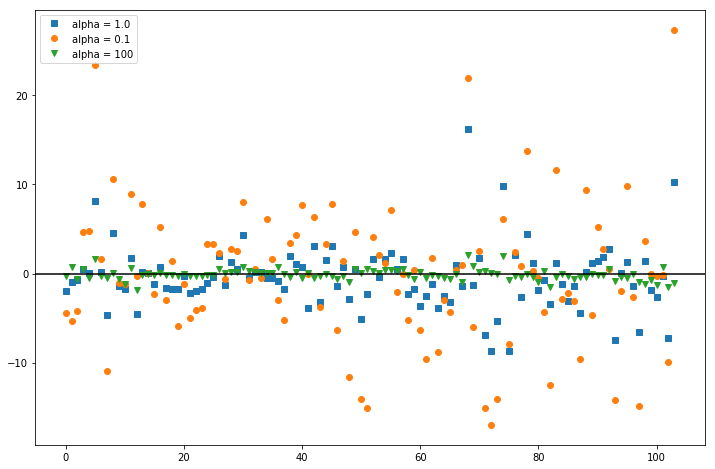

In [14]:
plt.figure(figsize = (12, 8))
plt.plot(ridge_default, 's', label = 'alpha = 1.0')
plt.plot(ridge_small, 'o', label = 'alpha = 0.1')
plt.plot(ridge_large, 'v', label = 'alpha = 100')
plt.axhline(color = 'black')
plt.legend()

In [15]:
model_test(Lasso())

Train r2 0.2413811214045961
Test r2 0.23465326635228245
Train RMSE:  7.987614775813742
Test RMSE: 8.056054117029639


In [16]:
model_test(ElasticNet())

Train r2 0.2789627199451664
Test r2 0.2767217557137198
Train RMSE:  7.787250557811698
Test RMSE: 7.831518161969369


### Problem

Examine the plots of coefficients for three different values of alpha.  Compare and contrast what we see with the four models (`LinearRegression`, `Ridge`, `Lasso`, `ElasticNet`) in terms of the values of coefficients across alpha values, and the values from model to model.

If you have time, find the ideal value for our regularization parameter using the `GridSearchCV`.

### Classification and Regularization

Here, we are focused on `LogisticRegression`, and the use of different regularization parameters and values for these parameters.  The aim is to draw connections between what happens with Regularization across our least squares strategies.

In [17]:
clf = LogisticRegression()

In [18]:
cancer = load_breast_cancer()

In [19]:
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

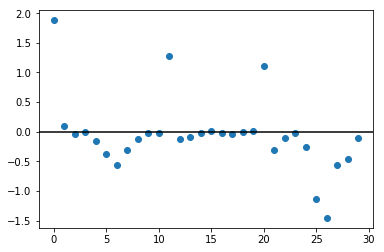

In [21]:
plt.plot(clf.coef_.T, 'o', label = 'Logistic Default')
plt.axhline(color = 'black')

In [22]:
clf_small = LogisticRegression(C = 0.1)
clf_small.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

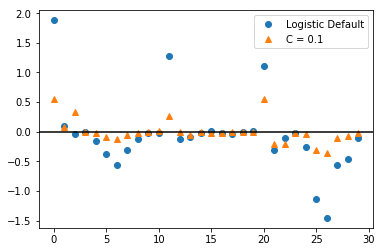

In [23]:
plt.plot(clf.coef_.T, 'o', label = 'Logistic Default')
plt.plot(clf_small.coef_.T, '^', label = 'C = 0.1')
plt.axhline(color = 'black')
plt.legend()

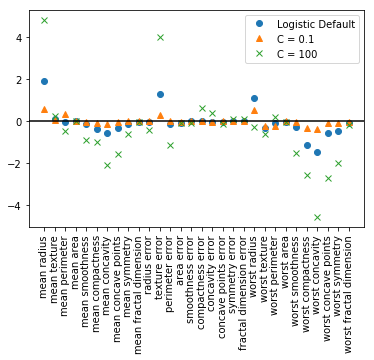

In [24]:
clf_big = LogisticRegression(C = 100)
clf_big.fit(X_train, y_train)
plt.plot(clf.coef_.T, 'o', label = 'Logistic Default')
plt.plot(clf_small.coef_.T, '^', label = 'C = 0.1')
plt.plot(clf_big.coef_.T, 'x', label = 'C = 100')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.axhline(color = 'black')
plt.legend()

### Applying L1 Regularization

In [25]:
clf_l1 = LogisticRegression(C = 1.0, penalty='l1')
clf_l1_small = LogisticRegression(C = 0.1, penalty='l1')
clf_l1_large = LogisticRegression(C = 100, penalty='l1')

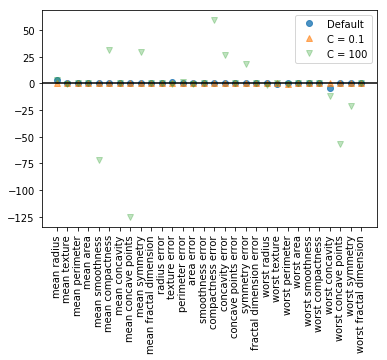

In [26]:
clf_l1.fit(X_train, y_train)
clf_l1_small.fit(X_train, y_train)
clf_l1_large.fit(X_train, y_train)

plt.plot(clf_l1.coef_.T, 'o', alpha = 0.8, label = 'Default')
plt.plot(clf_l1_small.coef_.T, '^', alpha = 0.6, label = 'C = 0.1')
plt.plot(clf_l1_large.coef_.T, 'v', alpha = 0.3, label = 'C = 100')
plt.axhline(color = 'black')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.legend()

### Takeaways

- We use regularization in both classification and regression
- Depending on the task, we want either `L1` or `L2` penalties
- We can grid search to find ideal `C`